
# Lecture IV: EXERCISES

----

In this exercises we will have a small look at how to use the libraries numpy and matplotlib in order to solve some famous physical mathematics problems.

### EXERCISE 0.1

Create a function that given an array $a$ and a float $L$ applies the following function $f(x)=20e^{-0.5(x-(L/2))^2/0.05}$ element wise and returns the resulting array.

In [1]:
import numpy as np

def f(x, L):
    return 20 * np.exp( -0.5*( x-(L/2) )**2/0.05 )

a = np.array([ [1,5,8],[5,5,9.5],[8.5,10,1.0],[0,0,1] ])

f_a = f(x=a, L=10)

print(f_a)

[[6.51497706e-069 2.00000000e+001 1.63880252e-038]
 [2.00000000e+001 2.00000000e+001 2.27194289e-087]
 [1.25879776e-052 5.33838043e-108 6.51497706e-069]
 [5.33838043e-108 5.33838043e-108 6.51497706e-069]]


### EXERCISE 0.2

Given a number of points N and a minimum and maximum position $xmin, xmax$, make a function that returns in an array a grid (N equidistant points) in between $[xmin,xmax]$. *Hint: You can Google if there is already any function doing this for you in numpy.*

In [2]:
# Option A: do it "by hand"

def generateGrid(N, xmin, xmax):
    dx=(xmax-xmin)/(N-1) # we compute the equidistant spacing step -note that N points mean N-1 intervals!-
    return np.array([ xmin+j*dx for j in range(0,N) ])


# Option B: use the already implemented np.linspace(start, stop, num) function
def generateGridNumpy(N, xmin, xmax):
    return np.linspace(xmin, xmax, num=N) #yeah, we could direclty call the numpy function

print(generateGrid(11,-7,6), generateGridNumpy(11,-7,6))
print(generateGrid(11,-7,6)==generateGridNumpy(11,-7,6))

[-7.  -5.7 -4.4 -3.1 -1.8 -0.5  0.8  2.1  3.4  4.7  6. ] [-7.  -5.7 -4.4 -3.1 -1.8 -0.5  0.8  2.1  3.4  4.7  6. ]
[ True  True  True  True  True  True  True  True  True  True  True]


### EXERCISE 0.3

Choose a certain float $L$, say $L=10$ and plot the previous function $f(x)$ for $x\in[0,L]$. *Hint: xmin=0, xmax=L*

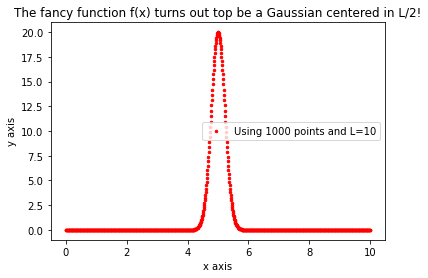

In [3]:
# Choose the parameters
L=10
xmin=0
xmax=L
N=1000 # number of points to plot

# Generate the points in x
x = generateGrid(N, xmin, xmax)

# Generate the points in f
y = f(x=x, L=L)

# Just plot x vs f using the fancy stuff of matplotlib
import matplotlib.pyplot as plt

plt.plot(x, y, 'ro', label=f'Using {N} points and L={L}', linewidth=1.0, markersize=2.5) # try -rlo, it will connect the points
plt.legend() # to show the labels of the plots
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title(f'The fancy function f(x) turns out top be a Gaussian centered in L/2!')
plt.show()

### EXERCISE 0.4

Plot again the previous function now in the range $[-10, 20]$ but now plot it for M=40 possible values of $L$ in $[-8, 18]$.

You could do this in the same plot, certainly it will be a mess. You could do it using multiplot as well, but 40 plots is too much. So just do it in different plots one after the other one.

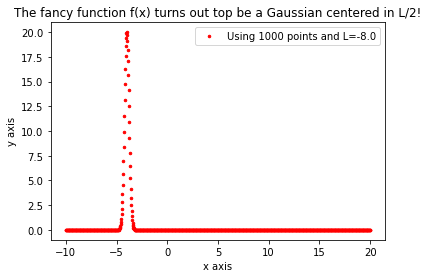

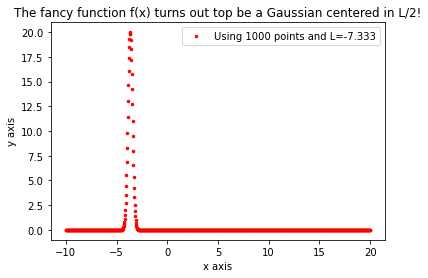

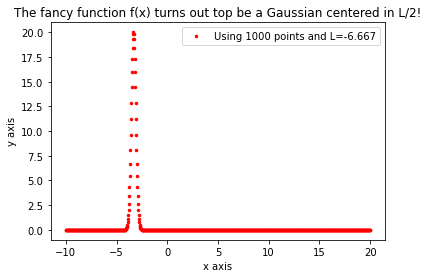

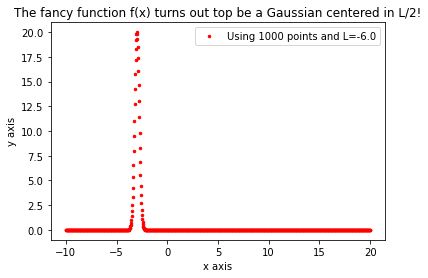

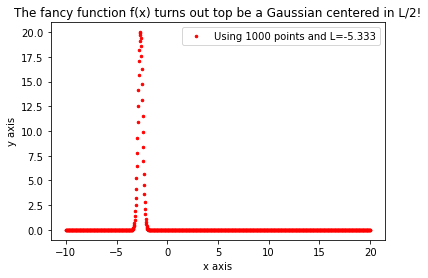

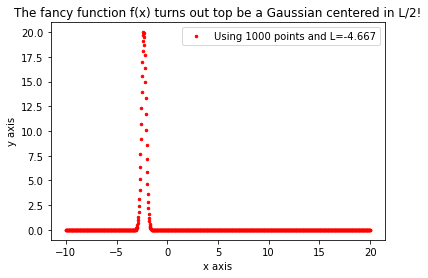

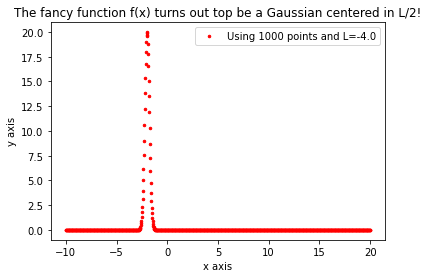

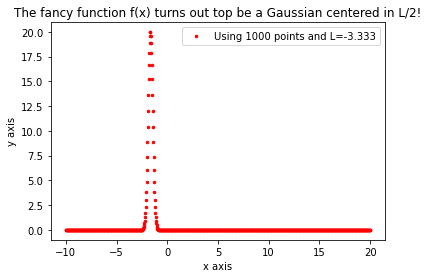

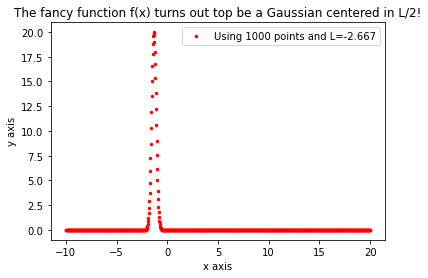

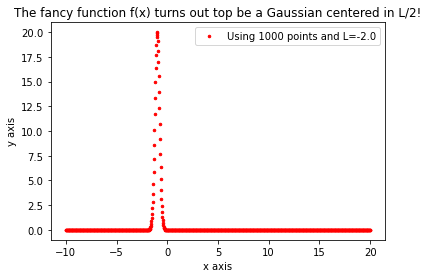

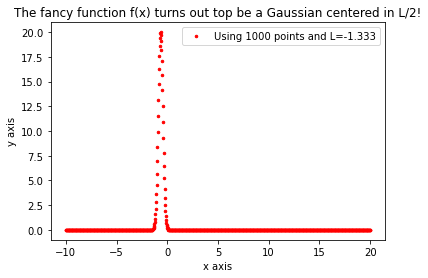

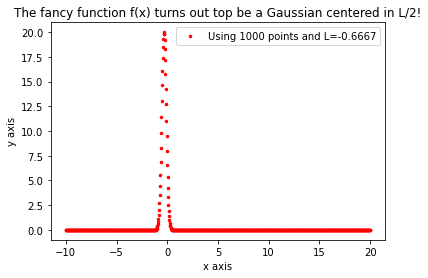

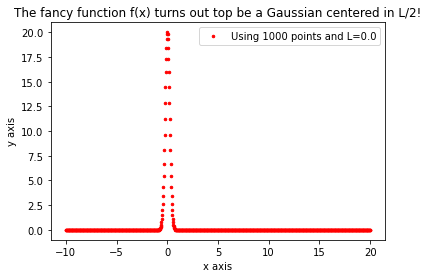

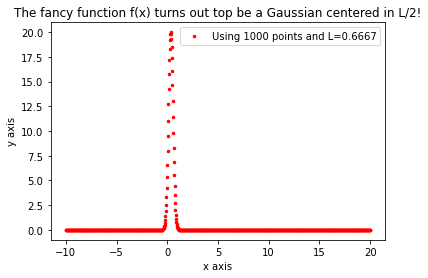

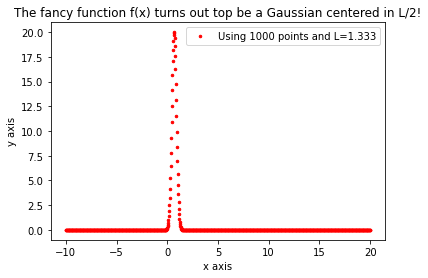

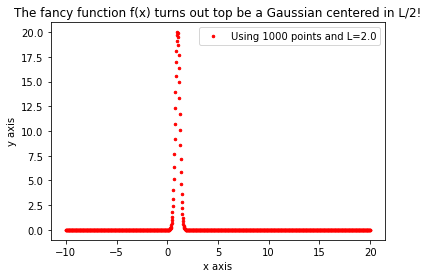

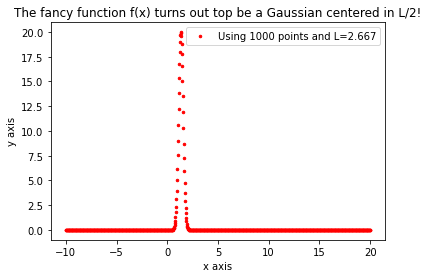

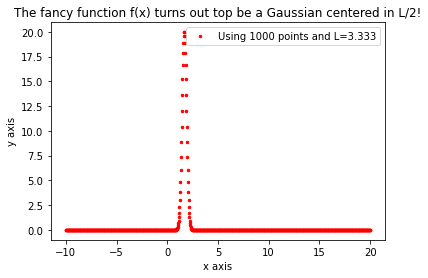

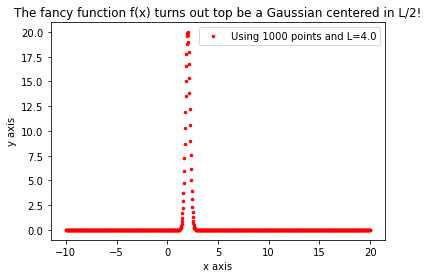

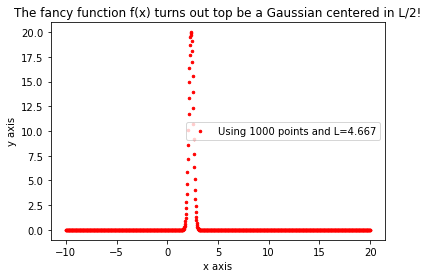

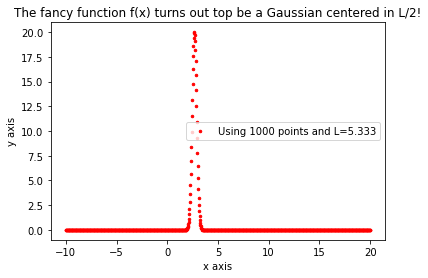

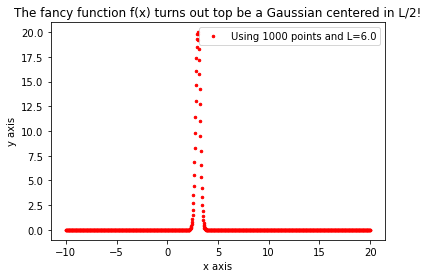

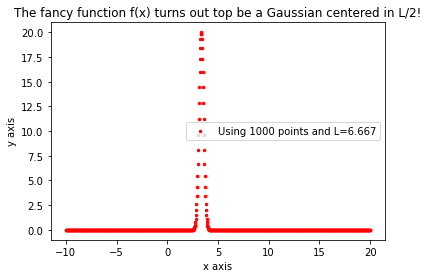

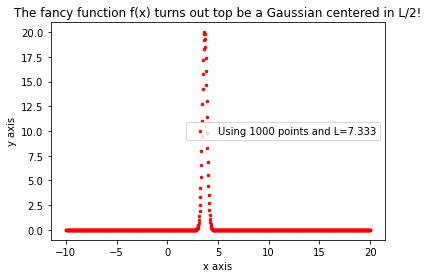

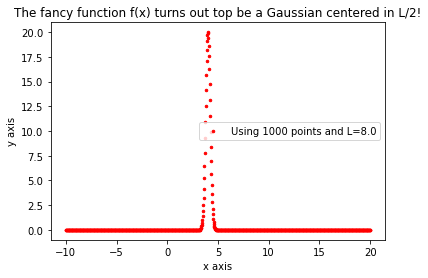

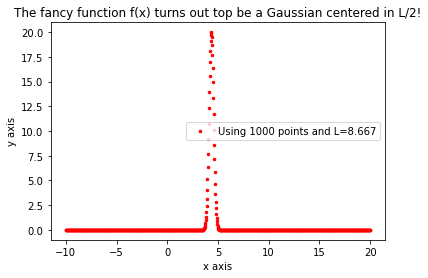

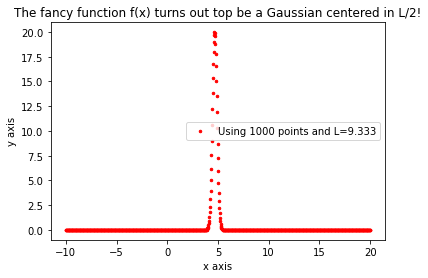

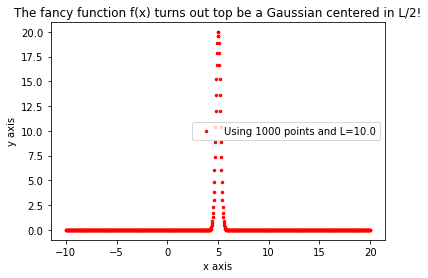

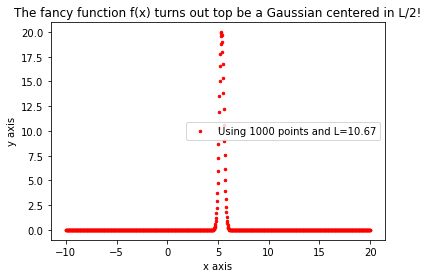

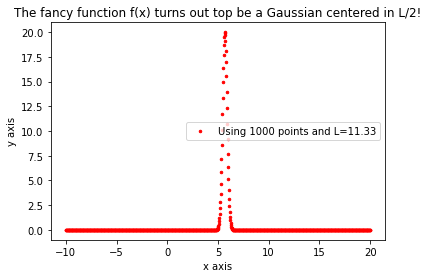

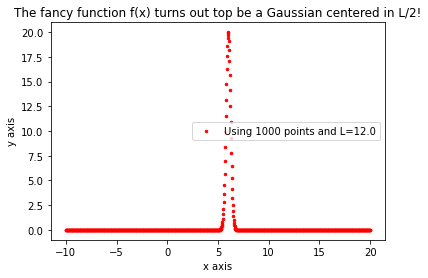

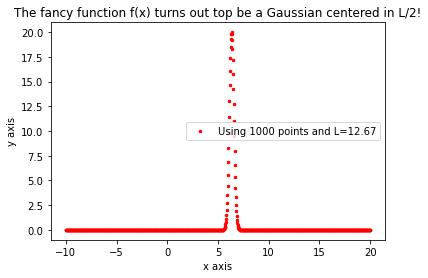

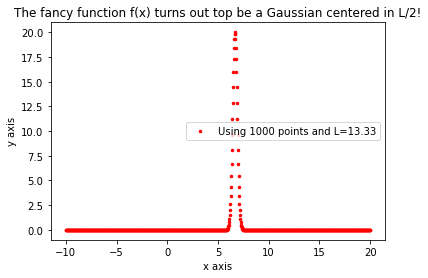

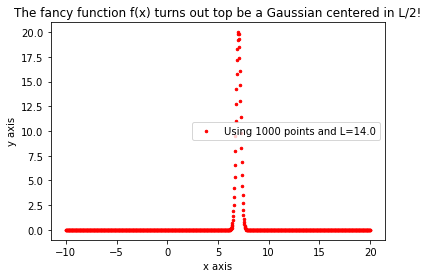

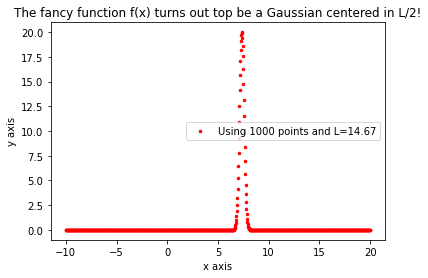

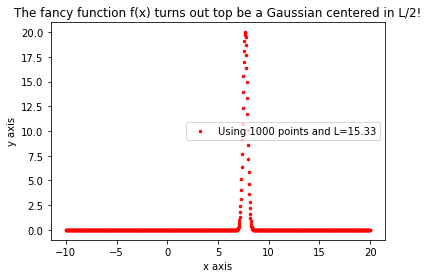

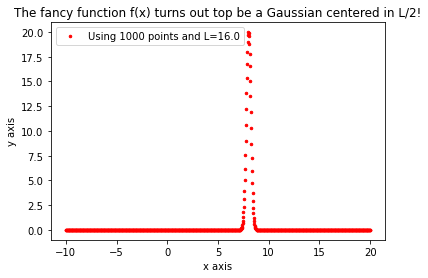

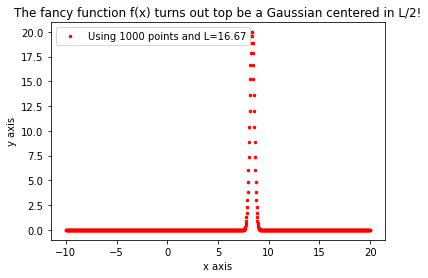

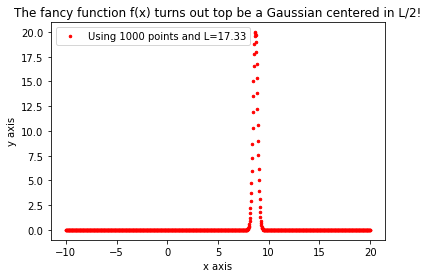

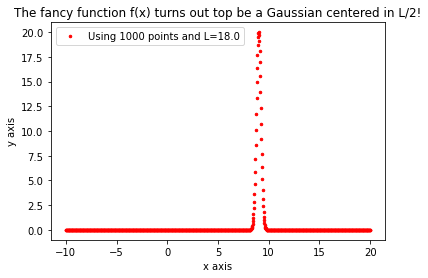

In [4]:
# Generate the L values we want to plot
M=40
possible_Ls = generateGrid(M, xmin=-8, xmax=18)

# Generate the x posible values where to plot
x = generateGrid(N, xmin=-10, xmax=20)

for i in range(possible_Ls.shape[0]):
    # Generate the points in f for this L
    y = f(x=x, L=possible_Ls[i])
    
    # Plot it and show it
    plt.plot(x, y, 'ro', label=f'Using {N} points and L={possible_Ls[i]:.4}', linewidth=1.0, markersize=2.5) # try -rlo, it will connect the points
    plt.legend() # to show the labels of the plots
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title(f'The fancy function f(x) turns out top be a Gaussian centered in L/2!')
    plt.show()

### EXERCISE 0.5

You have seen that Ex 0.4 results in a sequence where the gaussian fucntion $f(x)$ is "moving" towards positive x.
We can try to see this movement as a false animation if we clear the output of the cell each time we plot it.
To do this in a Jupyter Notebook, you can do `clear_output(wait=True)` after doing

`from IPython.display import clear_output`

If the plots are made too fast (the animation goes too fast) we can make the computer wait with `sleep()` getting it with `form time import sleep`, inputing the number of seconds to stop there.

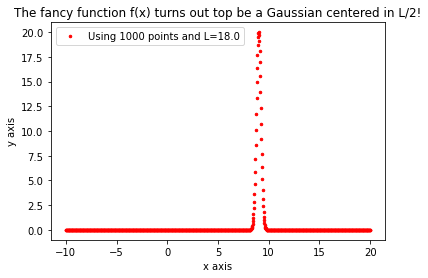

In [5]:
from IPython.display import clear_output

# Generate the L values we want to plot
M=40
possible_Ls = generateGrid(M, xmin=-8, xmax=18)

# Generate the x posible values where to plot
x = generateGrid(N, xmin=-10, xmax=20)

for i in range(possible_Ls.shape[0]):
    # Generate the points in f for this L
    y = f(x=x, L=possible_Ls[i])
    
    # Clean the outputs of this cell first
    clear_output(wait=True)
        
    # then plot the function and show it
    plt.plot(x, y, 'ro', label=f'Using {N} points and L={possible_Ls[i]:.4}', linewidth=1.0, markersize=2.5) # try -rlo, it will connect the points
    plt.legend() # to show the labels of the plots
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title(f'The fancy function f(x) turns out top be a Gaussian centered in L/2!')
    plt.show()

## Exercise 1: The Heat Diffusion Equation with Finite Differences

 The single spatial dimension (x) heat diffusion equation (modelling the diffusion of heat or density of chemical species etc., propelled by the agglomeration of the same quantity with no source nor leak) within the spatial region $x\in (0,L)$ and time $t\geq 0$ is given by the partial differential equation:

 $$
\frac{\partial u(x,t)}{\partial t} = \kappa \frac{\partial^2 u(x,t)}{\partial x^2}
 $$

where $u(x,t)$ is the temperature or amount of chemical species at position $x$ in time $t$, while $\kappa$ is the diffusivity coefficient of the medium, which we will assume to be constant.

Now, let us make the following approximations for the partial derivatives using **finite differences**:

$$
\frac{\partial u(x,t)}{\partial t} \simeq \frac{u(x,t +\Delta t)-u(x,t)}{\Delta t}
$$

$$
\frac{\partial^2 u(x,t)}{\partial x^2} \simeq \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{ \Delta x^2}
$$

As the time and spatial steps $\Delta t, \Delta x$ tend to zero, the approximations get each time better, following the definition of the derivative as the limit of the difference ratio. This means that if we choose small enough $\Delta t,\Delta x$, then the following approxiamtion of the differential equation might work for a numerical resolution:

$$
\frac{u(x,t +\Delta t)-u(x,t)}{\Delta t} = \kappa \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{\Delta x^2}
$$


$$
u(x,t +\Delta t) = u(x,t)+\Delta t\ \Big[\kappa \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{ \Delta x^2}\Big]
$$

$$
u(x,t +\Delta t) = \Big(1-2\kappa\frac{\Delta t}{\Delta x^2}\Big)\ u(x,t)+\kappa \frac{\Delta t}{\Delta x^2}\Big( u(x+\Delta x,t)+u(x-\Delta x,t)\Big)
$$


Thus, if we have an initial condition for the shape of $u(x,t)$, say we fix a known function $f(x)$ for $x\in(0,L)$ and we fix the boundaries at zero temperature (because there is a perfect ice bath at those points for example):

$$
u(x,t=0)=f(x)
$$

$$
u(x=0,t)=0\ \ \forall t\geq 0
$$
$$
u(x=L,t)=0\ \ \forall t\geq0
$$

Then we can obtain the shape of $u$ for the time $t=0+\Delta t$ as a function of the $u$ at time $t=0$ (which we know) and $\Delta x, \Delta t$, which we also know.

$$
u(x,\Delta t) = \Delta t\ \Big[u(x,0)+\kappa \frac{ u(x+\Delta x,0) -2u(x,0)+u(x-\Delta x,0)}{ \Delta x^2}\Big]
$$

If we divide the region $x\in [0,L]$ in $N$ pieces ($N+1$ points), then we will only consider the spatial points:

$$
x=j\Delta x \ \ for\ j=0,1,2,...,N
$$

$$
\Delta x = L/N
$$

We will only consider the temperature at those grid points for each time in $t=0, \Delta t, 2\Delta t, 3\Delta t...$.

Before going into the exercise, note that this approximate numerical solution is only valid if you choose $N, \Delta t, \kappa$ such that:

$$
\Delta t \leq \frac{\Delta x^2}{4\kappa}
$$

Otherwise, the approximation will diverge crazily.


**Exercise**: Make a simulator that computes the value for the temperature $u$ for each spatial point given the user inputs $\kappa, \Delta t, N, last\_time, L, f(x), plotEvery$ until it reaches a time bigger than $last\_time$. 

Every $plotEvery$ computed time iterations, plot the temperature profile.



***Spoilers:*** For this, first initialize the temperature vector, following the grid idea we have seen in the previous exercises. Then in each time iteration, you just need to use the equation to update the temperature vector:
$$
u(x,\Delta t) = \Delta t\ \Big[u(x,0)+\kappa \frac{ u(x+\Delta x,0) -2u(x,0)+u(x-\Delta x,0)}{ \Delta x^2}\Big]
$$

which in array language means, for each $i$ in the spatial grid, use the temperature in the previous time to compute the temperature in the next time for each point:

$$
u\_next\_time[i] = \Delta t\ \Big[u\_prev[i]+\kappa \frac{ u\_prev[i+1] -2u\_prev[i] +u\_prev[i-1]}{ \Delta x^2}\Big]
$$

Beware with the boundaries! For $i=0$ and the last $i$, there is no $[i-1]$ and $[i+1]$ respectively! But you do not need to be worried about the edges of the function, because for $u(x=0,t)=0=u(x=L,t)$ means $u[0]=0=u[N]$ at all times.

After each time you compute the new vector of values $u$, you can plot the temperature profile. In order to see a faster animation, you could make $\Delta t$ smaller, but it is better to do it by only ploting one frame per $plotEvery$ frames (check if the iteration counter is multiple of!). This is because playing with $\Delta t$ alters the quality of the approximation and the solution might diverge!

Also, you might see that the temperature suddenly goes to infinity. This is because numerical errors propagate through the approximations. There is a theorem though, by which if we make sure:

$$
\Delta t \leq \frac{\Delta x^2}{4\kappa}
$$

then the simulation will be stable for longer. You can make an assertion for this before simulating anything and raise an error else. 


**Possible Solution**:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output 
# This last import is a little trick to avoid ploting sequentially in Jupyter without erasing the previous frames

# User parameter declaration:

kappa=2.0
dt=0.00001
N=1000
last_time=1
L=10.0
plotEvery=1000

def f(x):
    return 20*np.exp(-0.5*(x-(L/2))**2/0.05)

In [7]:
def heat_Equation_Simulator(kappa, dt, N, last_time, L, f, plotEvery):
    # Compute the spatial grid width
    dx = L/N
    
    if dt>((0.25/kappa)*dx**2):
        raise ValueError(f"Unstable Region. Make dt smaller for this N and kappa. {dt}>{(0.25/kappa)*dx**2}")
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Initialize the u array for the first iteration
    u_0 = np.array([ f(xj) for xj in x])
    
    # Initialize the array u for the next iterations as a zeros array
    u_1 = np.zeros(u_0.shape) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        u_1[1:N] = (1-2*kappa*dt/dx**2)*u_0[1:N] + dt*kappa*( u_0[2:] + u_0[:(N-1)] )/dx**2
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):
            clear_output(wait=True)
            plt.plot(x, u_1, 'o', label=f'u(x,t={round(t,4)})', markersize=2.5) # plot the points
            plt.legend() # to show the labels of the plots
            plt.xlabel('Position x')
            plt.ylabel('Temperature u')
            plt.ylim(0,10.1)
            plt.title(f'Time {round(t,4)} Evolution for Temperature using N={N} points in space and time step dt={dt}')

            # plt.savefig(f'C:/Users/oiang/Downloads/heatDiffusion_time_{t}.jpg', dpi=300) # the full path of the new image !NOTE that the bars must be / and not \ in Windows as well as in Linux
            plt.show() #!!!! it is NOT necessary to show the image in order to save it as jpg
            
        # Swap what we previously called previous iteration
        u_0 = u_1

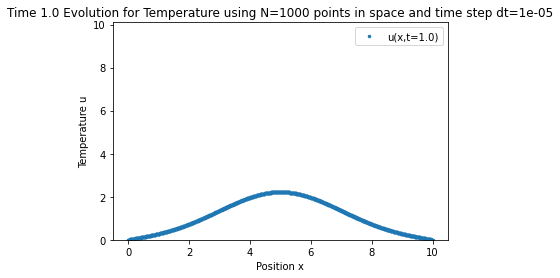

In [8]:
heat_Equation_Simulator(kappa, dt, N, last_time, L, f, plotEvery)

## Exercise 2: The Schrodinger Equation with Finite Differences

Given the Schrodinger Equation is the partial differential equation ruling the behaviour of a quantum particle in time, we can try to simulate the evolution of an electron in one dimension using a similar approach as the previous exercise. The equation is:

$$
i\hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) + U(x,t) \psi(x,t)
$$

where $\psi(x,t)$ is the wavefunction of the quantum particle. It is just a complex number per position in space and time $x,t$ such that according to Born's Rule, its magnitude squared $|\psi(x,t)|^2=\psi^*\psi$ gives us the probability to find the particle in that position.

We will consider again that the particle is bounded in a region of space $x \in [0,L]$ and we will consider times $t \geq 0$ such that we know the initial wavefunction (the initial distribution in space for the electron):

$$
\psi(x,t=0)=f(x)
$$

$$
\psi(0,t)=0\ \ \forall t\geq 0
$$
$$
\psi(L,t)=0\ \ \forall t\geq 0
$$

In the equation, $U(x,t)$ represents the potential energy field in which the particle is immersed. In this example we will assume it is time independent $U(x,t)=V(x)$.

Following the finite differences we casted in the previous exercise:

$$
\frac{\partial \psi(x,t)}{\partial t} \simeq \frac{\psi(x,t +\Delta t)-\psi(x,t)}{\Delta t}
$$

$$
\frac{\partial^2 \psi(x,t)}{\partial x^2} \simeq \frac{ \psi(x+\Delta x,t) -2\psi(x,t)+\psi(x-\Delta x,t)}{ \Delta x^2}
$$

Then, we can approximate numerically the Schrodinger Equation as:

$$
i\hbar \Big(\frac{\psi(x,t +\Delta t)-\psi(x,t)}{\Delta t}\Big) =  -\frac{\hbar^2}{2m} \frac{ \psi(x+\Delta x,t) -2\psi(x,t)+\psi(x-\Delta x,t)}{ \Delta x^2} + V(x) \psi(x,t)
$$

$$
\psi(x,t+\Delta t)=\Big( 1+\frac{\Delta t}{i\hbar}V(x)+\frac{\Delta t \hbar}{i m \Delta x^2} \Big)\psi(x,t) - \frac{\hbar \Delta t}{2im\Delta x^2}\Big( \psi(x+\Delta x,t)+\psi(x-\Delta x,t)\Big)
$$
Noting $1/i=-i$:

$$
\psi(x,t+\Delta t)=\Big( 1-\frac{i\Delta t}{\hbar}V(x)-\frac{i\Delta t \hbar}{ m \Delta x^2} \Big)\psi(x,t) + \frac{i\hbar \Delta t}{2m\Delta x^2}\Big( \psi(x+\Delta x,t)+\psi(x-\Delta x,t)\Big)
$$

This method will be unstable for many iterations, but we can tweak $\Delta t, \Delta x$ to make it stable for short time ranges.

If we divide the region $x\in [0,L]$ in $N$ pieces ($N+1$ points), then we will only consider the spatial points:

$$
x=j\Delta x \ \ for\ j=0,1,2,...,N
$$

$$
\Delta x = L/N
$$

We will only consider the wavefunction at those grid points for each time in $t=0, \Delta t, 2\Delta t, 3\Delta t...$.

Before going into the exercise, note that in python there are complex numbers. You just need to use $1j$ instead of the $i$ we used in the equations.

**Exercise**: Make a simulator that computes the value for the wavefunction $\psi$ for each spatial point, given the user inputs $\Delta t, N, last\_time, L, f(x), V(x), plotEvery$ until it reaches a time bigger than $last\_time$. You can assume it is an electron, by using atomic units $\hbar=1, m=1$. Every $plotEvery$ computed time iterations, compute the absolute squared value of the wavefunction and plot the probability to find the particle in each point together with the potential energy profile. You can also plot the real and imaginary parts and see their beauty.

**Possible Solution**:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output 
# This last import is a little trick to avoid ploting sequentially in Jupyter without erasing the previous frames

# User parameter declaration:

dt=0.000001
N=300
last_time=2
L=10.0
plotEvery=8000

def f(x, mu0=2.2, sigma=0.6, k0=0.0): # initially the particle will be a still gaussian distribution
    return (1/(np.pi*sigma**2))**(1/4)*np.exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x): # we will try a harmonic potential
    return 10*(x-(L/2))**2

In [12]:
def one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery):
    # Define the Planck Constant and the mass of the particle
    hbar=1
    m=1
    
    # Compute the spatial grid width
    dx = L/N
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Compute the potential energy in those points
    pot = np.array([ V(xk) for xk in x])
    
    # Initialize the psi array for the first iteration
    psi_0 = np.array([ f(xk) for xk in x])
    
    # Initialize the array psi for the next iterations as a zeros array
    psi_1 = np.zeros(psi_0.shape, dtype=np.complex) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        psi_1[1:N] = (1-1j*dt/hbar*pot[1:N]-1j*dt*hbar/(m*dx**2))*psi_0[1:N] + 1j*hbar*dt/(2*m*dx**2)*( psi_0[2:] + psi_0[:(N-1)] )
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):           
            plot_wavefunction_and_potential(psi_1, pot, x, t, N, dt)
            
        # Swap what we previously called previous iteration
        psi_0 = psi_1
        
        
def plot_wavefunction_and_potential(psi, pot, x, t, N, dt):
    # Compute the probability density
    probability = np.abs(psi)**2
    
    # Clear previous plots
    clear_output(wait=True)

    # Plot
    plt.plot(x, probability, '-', label=f'Probability(x,time={round(t,4)})', markersize=1.5) # plot the probability
    plt.plot(x, np.real(psi), '-', label=f'Real part', markersize=1.5) # plot the real part
    plt.plot(x, np.imag(psi), '-', label=f'Imaginary Part', markersize=1.5) # plot the imaginary part

    plt.ylim(-1.6,1.6)
    plt.xlabel('Position x')
    plt.ylabel('Probability Density |psi|**2')
    plt.legend()

    # In order to have the potential energy in a differnet y axis we use twinx
    plt.twinx()
    plt.plot(x, pot, '-', label=f'Potential Energy', markersize=1, color='grey') # plot the potential
    plt.ylabel('Potential Energy')

    plt.legend() # to show the labels of the plots
    plt.title(f'Time Evolution for Quantum Particle using N={N} points in space and time step dt={dt}')

    # plt.savefig(f'C:/Users/oiang/Downloads/schrodingerEvolution_time_{t}.png', dpi=300) # the full path of the new image !NOTE that the bars must be / and not \ in Windows as well as in Linux
    plt.show() #!!!! it is NOT necessary to show the image in order to save it as jpg


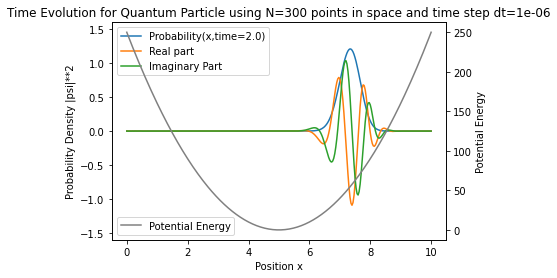

In [13]:
one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery)

We can see the famous quantum tunneling at work if we set a potential energy profile that represents a physical wall, and we provide the electron an initial momentum.

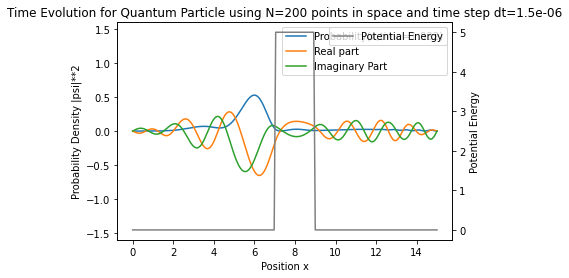

In [12]:
def f(x, mu0=5.5, sigma=0.6, k0=2.0): # the particle will be a moving gaussian distribution with momentum k
    return (1/(np.pi*sigma**2))**(1/4)*np.exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x, V0=5): # we will try a harmonic potential
    if x>7 and x<9:
        return V0
    else:
        return 0.0
    
one_Quantum_Particle_in_1d_Simulator(dt*1.5, 200, last_time, 15, f, V, plotEvery*7)

## Exercise 3: N-Body Newtonian Simulator

According to classical mechanics postulates, a system of $N$ particles can be completely described by knowing the time evolution of the position of each of the $N$ particles in three dimensional space $\mathbb{R}^3$ or some subset of it, in which the particles are constrained to move. We will denote the position of the $k$-th particle with a three componenet vector $\vec{x}_k=(x_k^1, x_k^2, x_k^3)$, and the **trajectory** of this particles (its position in each time) with the curve (vector moving in time) $\vec{x}_k(t)=(x_k^1(t), x_k^2(t), x_k^3(t))$, with $t\in\mathbb{R}$ the observation time. 

According to classical mechanics, each particle exerts an influence on each of the other particles that is called **force**. We will denote the force exerted by the $j$-th particle on the $k$-th particle as the three component vector $\vec{F}_{kj}(\vec{x}_k(t), \vec{x}_j(t))=(F_{kj}^1, F_{kj}^2, F_{kj}^3)$, which depends exclusively on the position of both particles at that particular time (in principle only on the relative position for the space to be homogeneous and isotropic), and not explicitly on time (by the conservation of total energy). By the conservation of momentum there must exist at the same time a force exerted by the $k$-th particle on the $j$-th such that: $\vec{F}_{jk}(\vec{x}_j(t), \vec{x}_k(t))=-\vec{F}_{kj}(\vec{x}_k(t), \vec{x}_j(t))$ (also known as the action-reaction law). Finally, the sum of all the forces on a particle is defined as the time variation of the momentum of each particle (the velocity $\frac{d\vec{x}_k(t)}{dt}\equiv \vec{v}_k(t)$ times a particular weighting parameter of the particle called its mass $m_k(t)$):

$$
\frac{d}{dt}\Big(m_k(t)\frac{d\vec{x}_k(t)}{dt}  \Big) = \sum_{j=1\\ j\neq k}^N \vec{F}_{kj}(\vec{x}_k(t), \vec{x}_j(t)) \quad \text{for each particle k$\in$\{1,2,...,N\}}
$$

By assuming the mass of each particle is constant, this is also known as Newton's second law:

$$
 m_k\frac{d^2\vec{x}_k(t)}{dt^2}  = \sum_{j=1\\ j\neq k}^N \vec{F}_{kj}(\vec{x}_k(t), \vec{x}_j(t)) \quad \text{for each particle k$\in$\{1,2,...,N\}}
$$

If for example we have only three particles $\vec{x}_1,\vec{x}_2,\vec{x}_3$, we will have the system of differential equations:

$$
\begin{cases}
m_1\frac{d^2\vec{x}_1(t)}{dt^2}=\vec{F}_{12}(\vec{x}_1(t), \vec{x}_2(t)) +\vec{F}_{13}(\vec{x}_1(t), \vec{x}_3(t)) \\
m_2\frac{d^2\vec{x}_2(t)}{dt^2}=\vec{F}_{21}(\vec{x}_2(t), \vec{x}_1(t)) +\vec{F}_{23}(\vec{x}_2(t), \vec{x}_3(t)) 
\\
m_3\frac{d^2\vec{x}_3(t)}{dt^2}=\vec{F}_{31}(\vec{x}_3(t), \vec{x}_1(t)) +\vec{F}_{32}(\vec{x}_3(t), \vec{x}_2(t)) 
\end{cases}
$$


We can write each of these second order equations as two first order differential equations with $\frac{d\vec{x}_k(t)}{dt}\equiv \vec{v}_k(t)$:

$$
\begin{cases} m_k\frac{d\vec{v}_k(t)}{dt}  = \sum_{j=1\\ j\neq k}^N \vec{F}_{kj}(\vec{x}_k(t), \vec{x}_j(t)) \\
\frac{d\vec{v}_k(t)}{dt} = \vec{x}_k(t)
\end{cases}\quad \text{for each particle k$\in$\{1,2,...,N\}}
$$

This means that if we know at a certain initial time $t_0$ the position of the $N$ particles $\vec{x}_1(t_0),...,\vec{x}_N(t_0)$ and we know the functions $\vec{F}_{jk}(\vec{x}_k(t), \vec{x}_j(t))$, we can get the total sum of force vectors affecting to each particle at that time $t_0$, by just evaluating the positions of the particles in the force function:
$$
\textbf{(Step 1)}\quad \vec{F}_{Total\ on\ k}(t_0) := \sum_{j=1\\ j\neq k}^N \vec{F}_{kj}(\vec{x}_k(t_0), \vec{x}_j(t_0)) 
$$
Then, if we also know the velocity vector of the particles at that initial time $t_0$, $\vec{v}_1(t_0),...,\vec{v}_N(t_0)$ we can use the finite difference approximation for the derivative:

$$
\frac{df(t_0)}{dt}\simeq \frac{f(t_0+\Delta t)-f(t_0)}{\Delta t}
$$

To get the velocity vector at time $t+\Delta t$ from Newton's second law (with $\Delta t$ a small time increment):

$$
\frac{d\vec{v}_k(t_0)}{dt} = \vec{F}_{Total\ on\ k}(t_0)\Longrightarrow \frac{\vec{v}_k(t_0+\Delta t)-\vec{v}_k(t_0)}{\Delta t}\simeq \vec{F}_{Total\ on\ k}(t_0)\Longrightarrow
$$

$$
\textbf{(Step 2)}\quad \vec{v}_k(t_0+\Delta t) \simeq \vec{v}_k(t_0)+\vec{F}_{Total\ on\ k}(t_0)\Delta t
$$

Then using the definition of the velocity vector we get the position of the particles in time $t_0+\Delta t$:

$$
\frac{d\vec{x}_k(t_0)}{dt} = \vec{v}_{k}(t_0)\Longrightarrow \frac{\vec{x}_k(t_0+\Delta t)-\vec{x}_k(t_0)}{\Delta t}\simeq \vec{v}_{k}(t_0)\Longrightarrow
$$

$$
\textbf{(Step 3)}\quad \vec{x}_k(t_0+\Delta t) \simeq \vec{x}_k(t_0)+\vec{v}_{k}(t_0)\Delta t
$$

Now that we know the positions of the $N$ particles at time $t+\Delta t$ we can again compute with Step 1 the total force on each particle now at time $t+\Delta t$, with which we can compute the velocity vectors of the $N$ particles at time $t_0+2\Delta t$ using Step 2 and then the position of the $N$ particles at time $t_0+2\Delta t$ with Step 3. And iterating this over and over, we can get the trajectories of the $N$ particles in time! 


Since the approximation for the derivative we are using is quite bad, we will need a very small $\Delta t$ for the solutions to be at least a bit stable, and certainly the particles will suddenly jump to infinity when errors start to build up, but until then, we will have a pretty cute simulator!

**EXERCISE 1**: For this exercise, we will assume that every particle interacts with the rest through the same forces (that is, for example the gravitational and the electric force). Following this algorithm write a function that takes as input:
- The number $N$ of particles to simulate.

- A matrix (2D array) with the three initial coordinates of each particle in each row (three columns and $N$ rows).

- A matrix (2D array) with the three initial coordinates of each particle's velocity in each row (three columns and $N$ rows).

- A list with the $N$ masses $m_k$ of the particles.

- A list with the different force functions that each particle exerts on the rest (say the gravitational and the electrical forces).

- It would be interesting to introduce also al list with additional $N$ parameters that can be used in the force functions, say the charges of the particles!

- The initial time `t0` (default equal to 0).

- The final time `tf` (default to 10).

- The number of time iterations we wish in that interval `timeIts`.

- A parameter `plotEvery` which states every how many iterations we wish to plot the system.

- A dictionary where we can introduce fixed limits of the plot box under the keys `xmin`, `xmax`, `ymin`, `ymax`, `zmin`, `zmax`.

The function should compute the position of the $N$ particles in each of the `timeIts` times from `t0` till `tf`. Then it should plot a 3D plot (using `scatter3D()` or `plot3D()`) with fixed x,y,z axes, where the positions of the particles are ploted every `plotEvery` time iterations. Use the "trick" we used in the previous exercises to do an "effective" animation. In the next lecture we will learn a simple way to really create animations.

**Note1:** You can find the gravitational force and the electric force equations in their vectorial form for example in:

https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation#Vector_form

https://en.wikipedia.org/wiki/Coulomb%27s_law#Vector_form_of_the_law

**Note2:** Try to use as much as possible the fact that the positions are already in a numpy array, which you can manipulate as a whole!

**SUGGESTED BEGINNING/INPUT**:

In [14]:
def gravity_force_on_particle_1_by_2(x1, x2, m1, m2, q1, q2, G=1.0):
    '''
    x1 and x2 are expected to be arrays of 3 elements (1 dimension) or 3x1 or 1x3 
    It returns a 3 element array back (the force vector)
    '''
    unit_vector = (x2-x1)/np.linalg.norm(x2-x1) # pointing from particle 1 to 2
    return (G*m1*m2/( np.linalg.norm(x2-x1)**2))*unit_vector

def coulomb_force_on_particle_1_by_2(x1, x2, m1, m2, q1, q2, k=1.0):
    '''
    x1 and x2 are expected to be arrays of 3 elements (1 dimension) or 3x1 or 1x3 
    It returns a 3 element array back (the force vector)
    '''
    unit_vector = -(x2-x1)/np.linalg.norm(x2-x1) # pointing from particle 2 to 1 (here if charges equal force must be repulsive thus the minus sign)
    return (k*q1*q2/( np.linalg.norm(x2-x1)**2))*unit_vector


These intial conditions should give you interesting outputs!

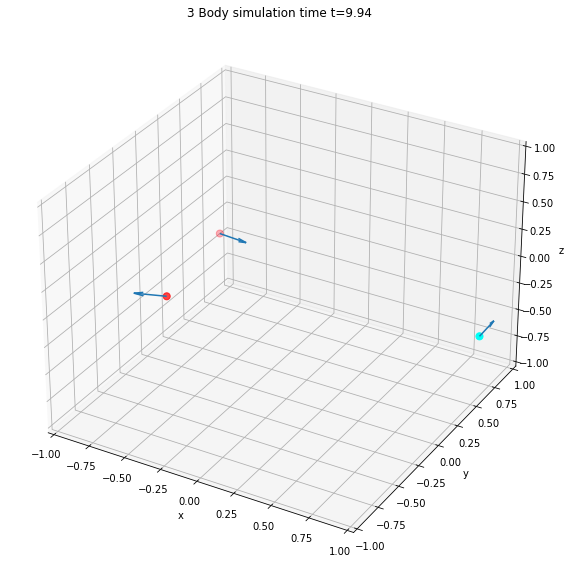

In [23]:
run_N_Body_simulator(N=3, positions_now=np.array([[0.97000436,-0.24308753,0], 
                                                  [-0.97000436,+0.24308753,0], 
                                                  [0,0,0]
                                                 ]), 
                    velocities_now=np.array([[0.93240737/2, 0.86473146/2, 0], 
                                             [0.93240737/2, 0.86473146/2, 0],
                                             [-0.93240737, -0.86473146, 0]]),
                    masses=[1, 1, 1,], 
                    additional_parameters=[0, 0, 0], 
                    force_list=[gravity_force_on_particle_1_by_2, coulomb_force_on_particle_1_by_2],
                    t0=0, tf=10, timeIts=3000, plotEvery=20,
                     limits={'xmin':-1, 'xmax':1, 'ymin':-1, 'ymax':1, 'zmin':-1, 'zmax':1}
                    )

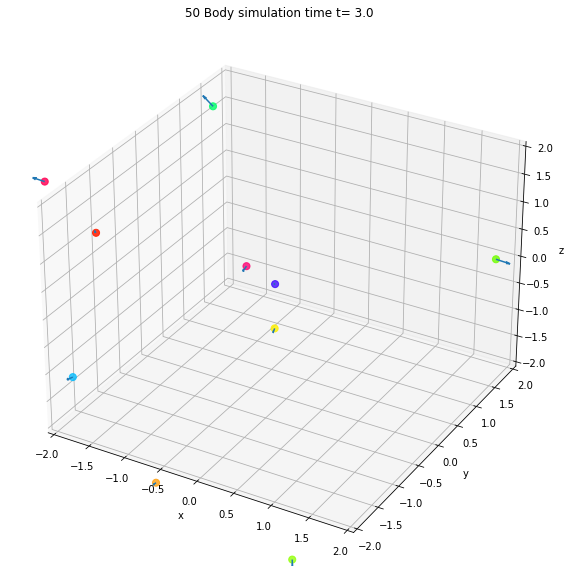

In [4]:
n=50
run_N_Body_simulator(N=n, positions_now=np.random.randn(n, 3)/2, 
                    velocities_now=np.random.randn(n, 3),
                    masses=np.random.randn(n), 
                    additional_parameters=[0]*n, 
                    force_list=[gravity_force_on_particle_1_by_2, coulomb_force_on_particle_1_by_2],
                    t0=0, tf=3, timeIts=400, plotEvery=1,
                     limits={'xmin':-2, 'xmax':2, 'ymin':-2, 'ymax':2, 'zmin':-2, 'zmax':2},
                    )

**POSSIBLE SOLUTION**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def run_N_Body_simulator(N, positions_now, velocities_now, masses, additional_parameters, 
                    force_list, t0, tf, timeIts, plotEvery, limits):
    # Compute the times in which the simulator will compute a step:
    times = np.linspace(start=t0, stop=tf, num=timeIts)
    # Get time increment delta t
    dt = times[1]-times[0]
    
    for it, t in enumerate(times):
        # a Nx3 array (matrix) where we will save the forces in each time
        forces = np.zeros(positions_now.shape)
    
        # Step 1, compute the total force on each particle
        for k, xk in enumerate(positions_now):
            for j, xj in enumerate(positions_now): # each of the other particles
                if j!=k: # does not self-interact!
                    for force in force_list:
                        forces[k,:] += force(xk, xj, masses[k], masses[j], additional_parameters[k], additional_parameters[j])
                        
        # Step 2, compute the velcity in the next time
        velocities_next = velocities_now + forces*dt
        
        # Step 3, compute the position of the particles in the next time
        positions_next = positions_now + velocities_now*dt
        
        # Plot the particles
        if it%plotEvery==0:
            plot_N_particles(positions_next, velocities_next, t,
                             limits['xmin'], limits['xmax'], limits['ymin'],
                             limits['ymax'], limits['zmin'], limits['zmax'])
        
        # prepare for the next time iteration
        velocities_now = velocities_next
        positions_now = positions_next
        

def plot_N_particles(positions, velocities, t, xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1):
    # Clear previous plots
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    # Plot particles
    ax.scatter3D(positions[:,0], positions[:,1], positions[:,2], c=np.arange(positions.shape[0]),
                 cmap='hsv', s=50)
    
    # plot velocity vectors
    ax.quiver(positions[:,0], positions[:,1], positions[:,2], 
              velocities[:,0], velocities[:,1], velocities[:,2], length=0.2, normalize=True) 
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    ax.set_title(f"{positions.shape[0]} Body simulation time t={t:4.3}")
    plt.show()

**EXERCISE 2**: We can make the plots more interesting if for example we add a trace to the particles in motion. for this, we can plot appart from the position of the particle itself, until the previous known $J$ positions. To do so, notice that we will need to preserve all the last $J$ time iteration's positions. Think on how to do it and modify the code to achieve it!

**Clue:** You can have a 3D tensor that has shape `(J, N, 3)` (or JxNx3) that you can initialize for all $J$ in the same position for each $N$ and then in each update you go moving the last $J-1$ one position towards the front, such that in the `[0, N,3]` we always have the current positions.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import clear_output

def run_N_Body_simulator(N, positions_now, velocities_now, masses, additional_parameters,
                    force_list, t0, tf, timeIts, plotEvery, limits, J_trace):
    # Compute the times in which the simulator will compute a step:
    times = np.linspace(start=t0, stop=tf, num=timeIts)
    # Get time increment delta t
    dt = times[1]-times[0]
    
    positions = np.zeros((J_trace, positions_now.shape[0], positions_now.shape[1]))
    positions[:] = positions_now # copy the same position in all J
    
    for it, t in enumerate(times):
        # a Nx3 array (matrix) where we will save the forces in each time
        forces = np.zeros(positions_now.shape)
    
        # Step 1, compute the total force on each particle
        for k, xk in enumerate(positions[0]):
            for j, xj in enumerate(positions[0]): # each of the other particles
                if j!=k: # does not self-interact!
                    for force in force_list:
                        forces[k,:] += force(xk, xj, masses[k], masses[j], additional_parameters[k], additional_parameters[j])
        
        # Step 2, compute the velcity in the next time
        velocities_next = velocities_now + forces*dt
        
        # Step 3, compute the position of the particles in the next time
        # first move all the positions one step onward
        positions[1:, :, :] = positions[:-1,:,:] # copy in the slots from 1 to J the ones that were in 0 to J-1
        
        positions[0,:,:] = positions[1,:,:] + velocities_now*dt
        
        # Plot the particles
        if it%plotEvery==0:
            plot_N_particles(positions, velocities_next, t,
                             limits['xmin'], limits['xmax'], limits['ymin'],
                             limits['ymax'], limits['zmin'], limits['zmax'])
        
        # prepare for the next time iteration
        velocities_now = velocities_next
        # for the position it is already prepared
    

def plot_N_particles(positions, velocities, t, xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1):
    # Clear previous plots
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = matplotlib.cm.get_cmap('hsv') # to have the same colors of th trace and the body
    
    # Plot particles
    ax.scatter3D(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
                 c=cmap(np.arange(positions.shape[1])/positions.shape[1]), s=50)
    
    # plot velocity vectors
    ax.quiver(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
              velocities[:,0], velocities[:,1], velocities[:,2], length=0.2, normalize=True)
    
    
    # plot the traces
    for j in range(positions.shape[1]): # for each particle its trace separately
        ax.plot3D(positions[:,j,0], positions[:,j,1], positions[:,j,2], '-', c=cmap(j/positions.shape[1]) )
    
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    ax.set_title(f"{positions.shape[1]} Body simulation time t={t:4.3}")
    plt.show()

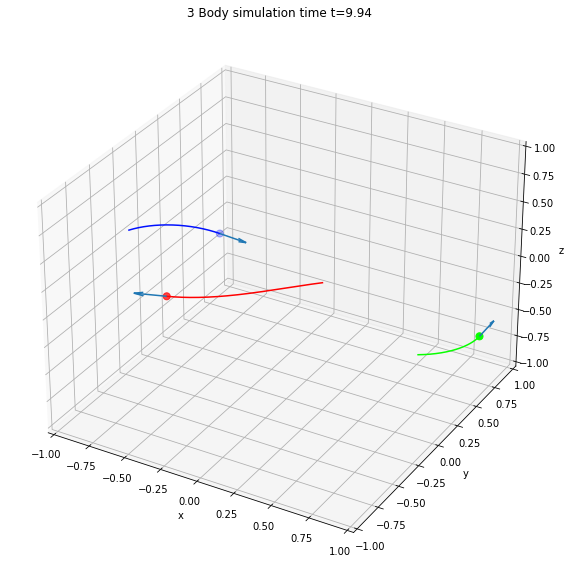

In [21]:
run_N_Body_simulator(N=3, positions_now=np.array([[0.97000436,-0.24308753,0], 
                                                  [-0.97000436,+0.24308753,0], 
                                                  [0,0,0]
                                                 ]), 
                    velocities_now=np.array([[0.93240737/2, 0.86473146/2, 0], 
                                             [0.93240737/2, 0.86473146/2, 0],
                                             [-0.93240737, -0.86473146, 0]]),
                    masses=[1, 1, 1,], 
                    additional_parameters=[0, 0, 0], 
                    force_list=[gravity_force_on_particle_1_by_2, coulomb_force_on_particle_1_by_2],
                    t0=0, tf=10, timeIts=3000, plotEvery=20,
                     limits={'xmin':-1, 'xmax':1, 'ymin':-1, 'ymax':1, 'zmin':-1, 'zmax':1},
                     J_trace=250
                    )

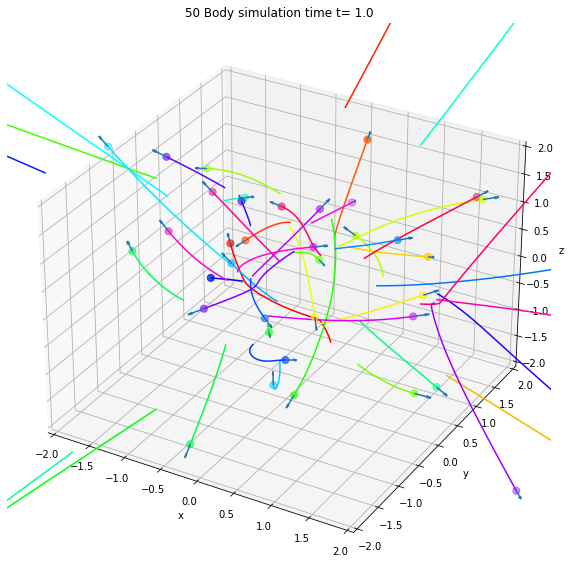

In [8]:
n=50
run_N_Body_simulator(N=n, positions_now=np.random.randn(n, 3)/2, 
                    velocities_now=np.random.randn(n, 3),
                    masses=np.random.randn(n), 
                    additional_parameters=[0]*n, 
                    force_list=[gravity_force_on_particle_1_by_2, coulomb_force_on_particle_1_by_2],
                    t0=0, tf=1.0, timeIts=200, plotEvery=1,
                     limits={'xmin':-2, 'xmax':2, 'ymin':-2, 'ymax':2, 'zmin':-2, 'zmax':2},
                     J_trace=100
                    )

As you can see heavy simulations can be a bit slow to show live. The solution is simple, just save each frame and mount something like a `.gif` animation with a desired frame-rate.
We will learn how to in the next lecture's exercises.

Also, if you play a little with the initial conditions of the simulator, you will find almost always the solution is that the bodys get ejected out of the frame. There are yet some more "stable" or elegant solutions. In the next lecture's exercises we will learn a way to import a dictionary with many beautiful initial conditions that you can try.